# Import libraries and src code

In [1]:
import os
import sys
sys.path.append('../src/')

import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16, Xception, ResNet101, DenseNet121
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.xception import preprocess_input as preprocess_xception
from tensorflow.keras.applications.resnet import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet

from data import data_split
from model import FireModel
from config import SAVED_MODELS_PATH

# Load data

In [2]:
train_data, val_data, test_data = data_split()

Using seed 8...

Loading training data...
Found 39375 files belonging to 2 classes.
Using 31500 files for training.

Loading validation data...
Found 39375 files belonging to 2 classes.
Using 7875 files for validation.

Loading test data...
Found 8617 files belonging to 2 classes.


# Utility functions

Quick utility function to graph the training and validation accuracy of the models.

In [3]:
def plot_accuracy(acc, val_acc):
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Train models

For experimentation purposes four models are chosen: VGG16, Xception, ResNet101 and DenseNet121. Their respective preprocessors are also retrieved.

In [4]:
models = [
  VGG16,
  Xception,
  ResNet101,
  DenseNet121,
]

preprocessors = [
  preprocess_vgg16,
  preprocess_xception,
  preprocess_resnet,
  preprocess_densenet,
]

Model: "VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 254, 254, 3)       0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 254, 254, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 254, 254, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_max_pooling2d (Global (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0     

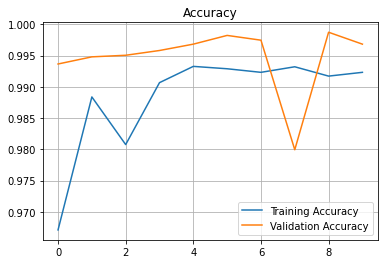

Model: "Xception"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 254, 254, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 254, 254, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 254, 254, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0  

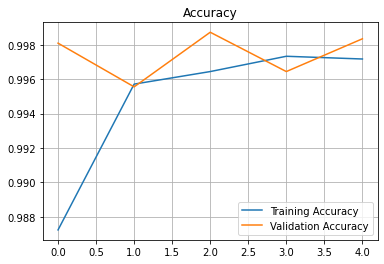

Model: "ResNet101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 254, 254, 3)       0         
_________________________________________________________________
tf.__operators__.getitem_1 ( (None, 254, 254, 3)       0         
_________________________________________________________________
tf.nn.bias_add_1 (TFOpLambda (None, 254, 254, 3)       0         
_________________________________________________________________
resnet101 (Functional)       (None, 8, 8, 2048)        42658176  
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0 

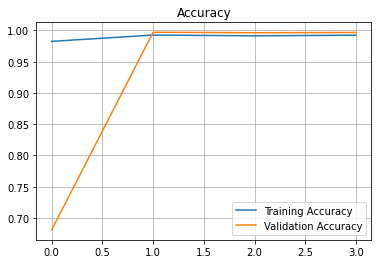

Model: "DenseNet121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 254, 254, 3)       0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 254, 254, 3)       0         
_________________________________________________________________
tf.nn.bias_add_2 (TFOpLambda (None, 254, 254, 3)       0         
_________________________________________________________________
tf.math.truediv_2 (TFOpLambd (None, 254, 254, 3)       0         
_________________________________________________________________
densenet121 (Functional)     (None, 8, 8, 1024)        7037504   
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 1024)              

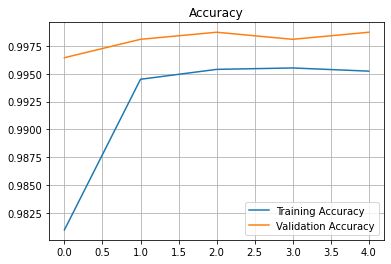

In [5]:
for base, preprocess in list(zip(models, preprocessors)):
    model = FireModel(base, preprocess)
    print(model.summary())
    
    history = model.train(train_data, val_data)
    
    plot_accuracy(history.history['accuracy'],
                  history.history['val_accuracy'])

# Evaluate models

Models are loaded and evaluated against the test set.

In [6]:
model_acc = {}

for saved_model in os.listdir(SAVED_MODELS_PATH):
    model = load_model(SAVED_MODELS_PATH+saved_model)
    loss, accuracy = model.evaluate(test_data)
    model_acc[saved_model] = accuracy
    
model_acc = sorted(model_acc.items(), key=lambda x: x[1], reverse=True)
print(model_acc)

270/270 [==============================] - 35s 129ms/step - loss: 1.3522 - accuracy: 0.7228
[('Xception', 0.9179528951644897), ('DenseNet121', 0.9020540714263916), ('ResNet101', 0.8589996695518494), ('VGG16', 0.7227573394775391)]


In [7]:
print(f'Best test accuracy {model_acc[0][1]}')

Best test accuracy 0.9179528951644897
